<a href="https://colab.research.google.com/github/YngBigBoy/Search_Hackaton/blob/main/Kaxaton_Right.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
f = open('/content/drive/My Drive/Xakaton/planesnet.json')
planesnet = json.load(f)

In [ ]:
from tensorflow.keras.utils import to_categorical
X = np.array(planesnet['data']) / 255.
X = X.reshape([-1,3,20,20]).transpose([0,2,3,1])
Y = np.array(planesnet['labels'])
Y = to_categorical(Y, 2)

In [ ]:
X.shape

(32000, 20, 20, 3)

In [ ]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел
import math # Для округления
import os #Для работы с файлами
from sklearn.model_selection import train_test_split

[1. 0.]


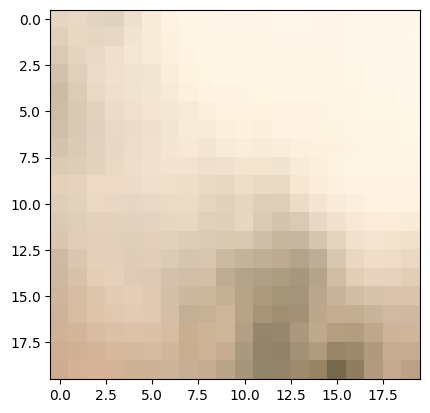

In [ ]:
plt.imshow(X[10150])
print(Y[10150])

[0. 1.]


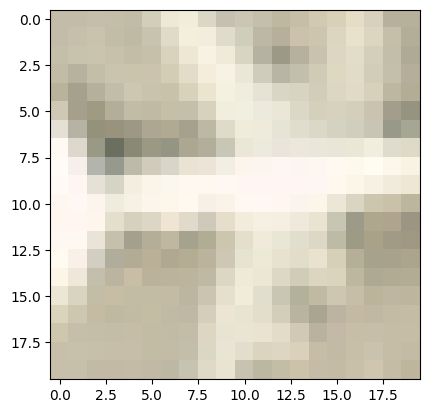

In [ ]:
plt.imshow(X[1011])
print(Y[1011])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25600, 20, 20, 3)
(6400, 20, 20, 3)
(25600, 2)
(6400, 2)


Epoch 1/20
200/200 [==============================] - 15s 9ms/step - loss: 0.2003 - accuracy: 0.9184 - val_loss: 0.3664 - val_accuracy: 0.8055
Epoch 2/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0901 - accuracy: 0.9654 - val_loss: 0.1013 - val_accuracy: 0.9689
Epoch 3/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0641 - accuracy: 0.9766 - val_loss: 0.0562 - val_accuracy: 0.9805
Epoch 4/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0485 - accuracy: 0.9823 - val_loss: 0.0573 - val_accuracy: 0.9802
Epoch 5/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0382 - accuracy: 0.9870 - val_loss: 0.0455 - val_accuracy: 0.9856
Epoch 6/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0333 - accuracy: 0.9878 - val_loss: 0.0407 - val_accuracy: 0.9873
Epoch 7/20
200/200 [==============================] - 2s 8ms/step - loss: 0.0267 - accuracy: 0.9904 - val_loss: 0.0525 - val_accuracy: 0.9823
Epoch

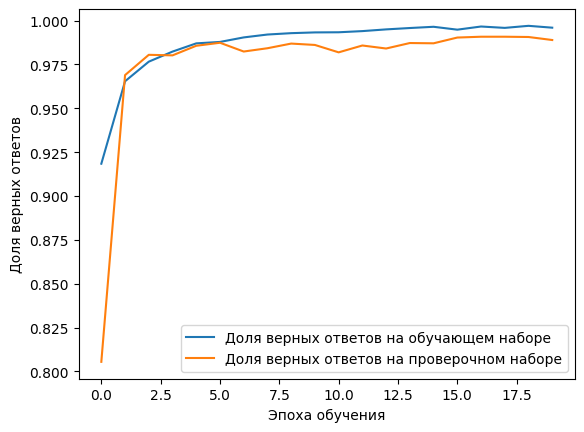

In [ ]:
batch_size = 128

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(20, 20, 3)))
#Первый сверточный слой
model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.12))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(40, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(40, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.12))



#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))

#Слой регуляризации Dropout
model.add(Dropout(0.12))
#Выходной полносвязный слой
model.add(Dense(2, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 20, 20, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 20)        560       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 20)        3620      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 20)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 10, 20)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 10, 10, 20)        8

In [ ]:
prediction = model.predict(x_test)

200/200 [==============================] - 1s 3ms/step


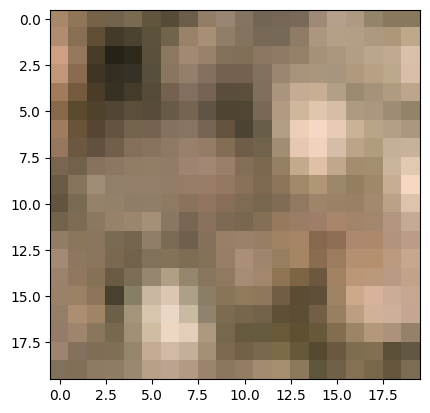

Выход сети:  [1.0000000e+00 5.9093767e-27]
Распознанный образ:  0
Верный ответ:  [1. 0.]


In [ ]:
n = 607

#Выводим на экран картинку
plt.imshow(x_test[n])
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test[n])

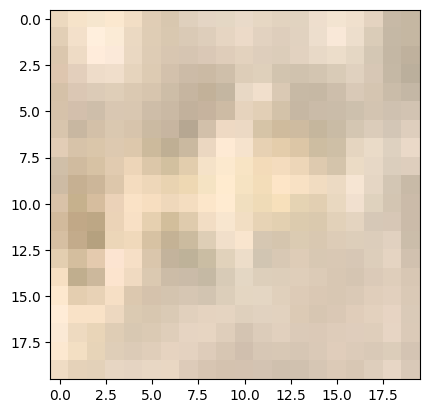

Выход сети:  [6.401934e-04 9.993598e-01]
Распознанный образ:  1
Верный ответ:  [0. 1.]


In [ ]:
n = 444

#Выводим на экран картинку
plt.imshow(x_test[n])
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test[n])

In [ ]:
#MAE метрика
sum_of_predictions = 0
for idx in range(1000):
    is_exits = 1 if y_test[idx][0] == '0' else 0

    sum_of_predictions += abs(is_exits - np.argmax(prediction[idx]))

print(f'MAE = {sum_of_predictions / 1000}')


MAE = 0.236


In [ ]:
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")



Saved model to disk


In [ ]:
imgs = []
bad = []
dirname = '/content/drive/My Drive/Xakaton/avia-test'
for imgname in os.listdir(dirname):

        img = Image.open(os.path.join(dirname, imgname))
        img = np.array(img)
        if img.shape == (20, 20, 3):
              imgs.append(img)
        else:
              bad.append(imgname)





In [ ]:
bad


['71586e2b-f9c6-41c6-a26b-acb10eeaee32.png',
 'de5f8bed-6a9b-4ece-9c57-345e923def22.png',
 'd07b43d9-054a-4752-a3c8-ae8c780874a3.png',
 '73391958-6b88-40a5-9191-5386b7925b40.png',
 'ebfaea85-562d-4b78-baa2-13f7622535f3.png',
 '43af096e-2776-43f4-bc44-457fc3e33bba.png',
 '0c2eb4b7-a85a-4807-a4e4-4491748a390d.png',
 'c79a5362-30cc-49c2-9faa-dc4577df8825.png',
 'f4c0f480-725d-4002-961c-703586636e55.png',
 '71da2b41-4bbf-420b-b5ad-8f5352af0c50.png',
 '92188a26-cfe7-41cc-b84a-729a89c3afc6.png',
 '176a953d-959f-416e-b6da-c47b3ff1e0f5.png',
 '93a5da1c-3aea-44aa-9240-96cb8ed18994.png',
 'e6d95799-8c48-4a79-ba2a-09b985447158.png',
 'dfd9000d-4100-448e-8c28-242d0ae24dcd.png',
 '52ee5526-930d-4efc-b7bc-afe56d970278.png',
 '8184f255-2bf3-4d16-9cf5-e5296df8db9f.png',
 '475adc32-815a-4f06-ae6a-61a992c42fbd.png',
 'fd08f9af-0bc8-4462-b4e9-3e77a783b49c.png',
 '0664e6a4-610a-4c97-b5e2-b05177de7163.png',
 '90952d65-f789-4d4c-abf6-71789a080b1b.png',
 '964624c7-4e79-4c9e-a86b-bd99678618b9.png',
 'e42c0702

In [ ]:
im3.shape


(941, 20, 20, 3)

In [ ]:
X_val = im3 / 255.
#X_val = X_val.reshape([-1,3,20,20]).transpose([0,2,3,1])

In [ ]:
X_val.shape

(941, 20, 20, 3)

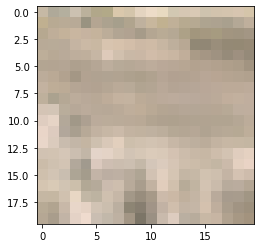

In [ ]:
plt.imshow(X_val[364])
plt.show()

In [ ]:
prediction = model.predict(X_val)

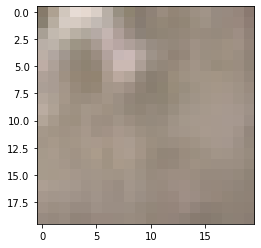

Выход сети:  [9.999999e-01 6.386709e-08]
Распознанный образ:  0


In [ ]:
n = 88

#Выводим на экран картинку
plt.imshow(X_val[n])
plt.show()
pred_list = []


print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
